In [1]:
from siriuspy.ramp.wfmset import Waveform
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Waveform Class

There is one base __Waveform__ class that implements all methods to create, modify and retrives waveforms.

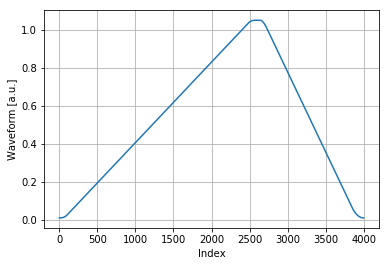

value at maximum         : 1.050000
value at injection point : 0.050000 (idx = 160)
value at ejection point  : 1.000000 (idx = 2400)


In [2]:
# With no arguments the constructor creates a default waveform:

w = Waveform()

%matplotlib inline
plt.plot(w)
plt.xlabel('Index'); plt.ylabel('Waveform [a.u.]')
plt.grid('On')
plt.show()

# By default the value 1.0 should correspond to the beam ejection point, 
# whereas the value 1.0/20 (20 = E_eje/E_inj) should correspond to the injection point:

idx_inj = 160
idx_eje = 2400
print('value at maximum         : {:4f}'.format(max(w)))
print('value at injection point : {:4f} (idx = {})'.format(w[idx_inj],idx_inj))
print('value at ejection point  : {:4f} (idx = {})'.format(w[idx_eje],idx_eje))

_Waveform_ objects are composed of one parameterized waveform and one curve bumps on top of the parameterized one.

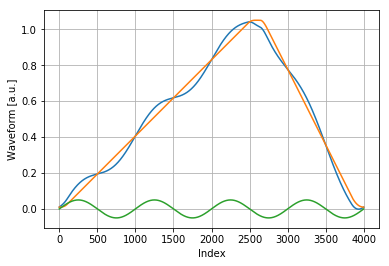

In [3]:
w = Waveform()

w.waveform_bumps = 0.05*np.sin(2*np.pi*np.array(range(len(w)))/1000)
wt = w.waveform
wp = w.waveform_parms
wb = w.waveform_bumps

%matplotlib inline
plt.plot(wt) # plot total waveform [BLUE]
plt.plot(wp) # plot parameterized component [ORANGE]
plt.plot(wb) # plot bump component [GREEN]
plt.xlabel('Index'); plt.ylabel('Waveform [a.u.]')
plt.grid('On')
plt.show()

# Waveform Parametrization

The parametrized component of the waveform is composed of 9 disctinct regions. There are therefore 8 indices that define the internal limits of each region. The first and last regions, for the default waveform, have zero widths. In each regian the default waveform is a polynominal curve of varying order.

Regions internal limits: [0, 104, 2480, 2576, 2640, 2736, 3840, 4000]

Region 0 (linear), 0  <= i < i0, i0 = 0
Region 1 (cubic) , i0 <= i < i1, i1 = 104
Region 2 (linear), i1 <= i < i2, i2 = 2480 (ramp up)
Region 3 (cubic),  i2 <= i < i3, i3 = 2576
Region 4 (linear), i3 <= i < i4, i4 = 2640 (plateau)
Region 5 (cubic),  i4 <= i < i5, i5 = 2736
Region 6 (linear), i5 <= i < i6, i6 = 3840 (ramp down)
Region 7 (cubic),  i6 <= i < i7, i7 = 4000
Region 8 (linear), i7 <= i < 4000


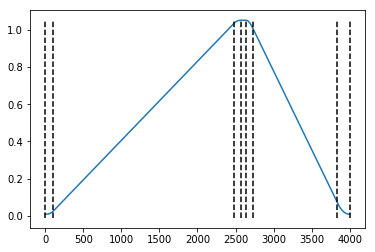

In [29]:
w = Waveform()
print('Regions internal limits: {}'.format(w.i07))
print('')
print('Region 0 (linear), 0  <= i < i0, i0 = {}'.format(w.i0))
print('Region 1 (cubic) , i0 <= i < i1, i1 = {}'.format(w.i1))
print('Region 2 (linear), i1 <= i < i2, i2 = {} (ramp up)'.format(w.i2))
print('Region 3 (cubic),  i2 <= i < i3, i3 = {}'.format(w.i3))
print('Region 4 (linear), i3 <= i < i4, i4 = {} (plateau)'.format(w.i4))
print('Region 5 (cubic),  i4 <= i < i5, i5 = {}'.format(w.i5))
print('Region 6 (linear), i5 <= i < i6, i6 = {} (ramp down)'.format(w.i6))
print('Region 7 (cubic),  i6 <= i < i7, i7 = {}'.format(w.i7))
print('Region 8 (linear), i7 <= i < {}'.format(len(w)))

w_min, w_max = min(w), max(w)
%matplotlib inline
plt.plot(w)
plt.plot([w.i0,w.i0],[-w_min,w_max], 'k--')
plt.plot([w.i1,w.i1],[-w_min,w_max], 'k--')
plt.plot([w.i2,w.i2],[-w_min,w_max], 'k--')
plt.plot([w.i3,w.i3],[-w_min,w_max], 'k--')
plt.plot([w.i4,w.i4],[-w_min,w_max], 'k--')
plt.plot([w.i5,w.i5],[-w_min,w_max], 'k--')
plt.plot([w.i6,w.i6],[-w_min,w_max], 'k--')
plt.plot([w.i7,w.i7],[-w_min,w_max], 'k--')
plt.show()

Waveform values at these 8 limit indices and at the waveform extremities can also be accessed using the class interface method, with a few constraints:

In [39]:
print('Value at i=0 and at i=i0 is given by property "vL0"     : {:4f}'.format(w.vL0))
print('Value at at i=i1 is given by property "v1"              : {:.4f}'.format(w.v1))
print('Value at at i=i2 is given by property "v2"              : {:.4f}'.format(w.v2))
print('Value at at i=i3 and at i=i4 is given by property "v34" : {:.4f}'.format(w.v34))
print('Value at at i=i5 is given by property "v5"              : {:.4f}'.format(w.v5))

Value at i=0 and at i=i0 is given by property "vL0"     : 0.010000
Value at at i=i1 is given by property "v1"              : 0.0263
Value at at i=i2 is given by property "v2"              : 1.0339
Value at at i=i3 and at i=i4 is given by property "v34" : 1.0500
Value at at i=i5 is given by property "v5"              : 1.0000


In [29]:
w = Waveform()
print('@ i = {}, value = {}'.format())

1.0339285714285713


In [30]:
i = 104; print(0.05 + (i -  160.0) * (1 - 0.05) / (2400 - 160))

0.026250000000000006
